# Organization
## Register as a Group in Ilias
For submission, please form a group of three students. You have to be assigned to a group in Ilias.
You can use the "[Looking for a group](https://ilias.studium.kit.edu/ilias.php?ref_id=1948869&cmd=render&cmdClass=ilrepositorygui&cmdNode=x1&baseClass=ilRepositoryGUI)" forum to team up.
As for submitting the homeworks, please make sure that you mention all your groupmates for the group submission.

## Submission guidelines

**The exercises should be solved and submitted as a group of three students.**

For the submission of the exercise please follow these steps:

1. Make sure that every cell is executed and that your plots are properly displayed and saved.
2. Create a .zip file of your filled-in notebook, a potential pen & paper solution (for some exercises only), and the folder containing your saved plots.
By default, the plot folder will be in your Google Drive in `rl_ws23/exercise_i/date` for the i-th exercise.
3. Rename your zip file with the following naming convention: `group_y_uxxxx_uxxxx_uxxxx`, where `y` is your group number, `uxxxx` is the kit user from each group member.
4. Upload the zip file to Ilias.

For this exercise, please try to fill in the code where stated.
It demonstrates some basic operations we will need for this course.
Then, submit this exercise following the instructions above.
This submission is only for getting familiar with the submission procedure, it will not be graded.


## Jupyter Notebooks and Google Colab

### Jupyter Notebooks
Usually, each coding exercise will provide you with a Jupyter notebook.
These notebooks contain markdown/text cells (such as this one), and python code cells (like the ones further below).
Each code cell can be run separately, and access a global state for the whole notebook.
Code that has been compiled in one cell (such as functions, classes or imports) is available in other cells.
It is also possible to use $\LaTeX$ equations inside the markdown environment.
You can freely edit the code in the code-cells, and then compile a cell by clicking on the arrow next to it.

For the exercises, you will be provided with an incomplete algorithm and are required to fill in missing methods and functions.
These incomplete segments are marked with **TODO** statements, and often contain hints on what exactly needs to be done.

### Google Colab
You have the option to either run Jupyter notebook either locally using an IDE, or in the cloud using Google Colab.
Google Colab will directly save logs and recordings to a designated folder in your Google Drive.

Alternatively, you may want to use an IDE on your PC instead, and only deploy experiments on the cluster.
For this, we recommend using either [PyCharm](https://www.jetbrains.com/pycharm/) or [Visual Studio Code](https://code.visualstudio.com/).
As a student, you can get educational licenses for both from the [KIT Software Shop](https://www.scc.kit.edu/dienste/4800.php).
We recommend using conda (or mamba) for managing a virtual environment with all the Python packages required for the exercises.

# Preliminaries
This section introduces the tools that we will be working with in this course.
You will find the actual exercise in the Section "Exercise 0" below.

## Python, Numpy and PyTorch
Deep Reinforcement Learning algorithms often require carefully designed and complex training routines. Practitioners usually use a range of tools to deal with this complexity.
We list the ones that we will focus on during the lecture below, and strongly encourage you to familiarize yourself with them if you have not heard of them before.

### Python
All programming exercises for this course are based on [Python](https://www.python.org/downloads/).
Python is a programming language focused around easy syntax and quick development.
It has a lot of infrastructure for Deep Reinforcement Learning and more generally Machine Learning applications.

### Numpy
[NumPy](https://numpy.org/) is a library for scientific computing in Python. It is structured around the *ndarray*, which is a multidimensional container that allows for easy and efficient operations on high-dimensional arrays.
* An introduction to NumPy can be found [here](https://numpy.org/doc/stable/user/quickstart.html)

### PyTorch
[PyTorch](https://pytorch.org/) is an automatic differentiation framework that builds on NumPy. It offers a wide range of tools and pre-build blocks for different machine learning approaches. We will mainly use PyTorch for the *deep* part of Deep Reinforcement Learning, i.e., to build and train deep neural networks.
* To get started with PyTorch, we recommend [this tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* For a quick primer on PyTorch Tensors, see [this tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
* For more information on automatic differentiation in Pytorch, see this [this tutorial](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).

## Local Setup

If you haven't yet, create a [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html) environment using:
```
conda create --name rl_exercises
conda activate rl_exercises
```
Torch recommends installation using conda rather than pip, so run:
```
conda install pytorch cpuonly -c pytorch
```
If you have a CUDA-enabled GPU and would like to use it, visit [the installation page](https://pytorch.org/get-started/locally/) to see the options available for different CUDA versions.
The remaining dependencies can be installed with pip:
```
pip install matplotlib numpy tqdm ipykernel
```

Even if you are running the Jupyter notebook locally, please run the code cells in **Colab Setup**, because they define some global variables required later.

## Colab Setup

Google Colab provides you with a temporary environment for python programming.
While this conveniently works on any platform and internally handles dependency issues and such, it also requires you to set up the environment from scratch every time.
The "Colab Setup" section below will be part of **every** exercise and contains utility that is needed before getting started.

There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window).
Any changes you make to the Jupyter notebook itself should be saved to your Google Drive.
We also save all recordings and logs in it by default so that you won't lose your work in the event of an instance timeout.
However, you will need to re-mount your Google Drive and re-install packages with every new instance.

In [1]:
"""Your work will be stored in a folder called `rl_ws23` by default to prevent Colab
instance timeouts from deleting your edits.
We do this by mounting your google drive on the virtual machine created in this colab
session. For this, you will likely need to sign in to your Google account and allow
access to your Google Drive files.
"""

import os
try:
    from google.colab import drive
    drive.mount("/content/gdrive")
    COLAB = True
except ImportError:
    COLAB = False

# Create paths in your google drive
if COLAB:
    DRIVE_PATH = "/content/gdrive/My\ Drive/rl_ws23"
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace("\\", "")
    if not os.path.exists(DRIVE_PYTHON_PATH):
        %mkdir $DRIVE_PATH

    # the space in `My Drive` causes some issues,
    # make a symlink to avoid this
    SYM_PATH = "/content/rl_ws23"
    if not os.path.exists(SYM_PATH):
        !ln -s $DRIVE_PATH $SYM_PATH
    %cd $SYM_PATH

# Install **python** packages
if COLAB:
    %pip install matplotlib numpy torch tqdm

Mounted at /content/gdrive
/content/gdrive/My Drive/rl_ws23


# Exercise 0

This section specifies the actual exercise.
For exercise 0, it just contains some self-contained code cells for you to play around with.
Later exercises will deal with more complex algorithms and follow a common structure to do so.

All homeworks are self-contained.
They can be completed in their respective notebooks.
To edit and re-run code, you can therefore simply edit and restart the code cells below.

We start by importing necessary packages and creating a progress bar.

In [2]:
from __future__ import annotations

import time

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn import MSELoss
from torch.optim import SGD
import tqdm

np.random.seed(0)
torch.manual_seed(0)


class ProgressBar:
    def __init__(self, num_iterations: int, verbose: bool = True) -> None:
        if verbose:  # create a nice little progress bar
            self.scalar_tracker = tqdm.tqdm(
                total=num_iterations,
                desc="Scalars",
                bar_format="{desc}",
                position=0,
                leave=True,
            )
            progress_bar_format = (
                "{desc} {n_fmt:"
                + str(len(str(num_iterations)))
                + "}/{total_fmt}|{bar}|{elapsed}<{remaining}"
            )
            self.progress_bar = tqdm.tqdm(
                total=num_iterations,
                desc="Iteration",
                bar_format=progress_bar_format,
                position=1,
                leave=True,
            )
            self.verbose = True
        else:
            self.verbose = False

    def __call__(self, **kwargs) -> None:
        if self.verbose:
            formatted_scalars = {
                key: "{:.3e}".format(value[-1] if isinstance(value, list) else value)
                for key, value in kwargs.items()
            }
            description = "Scalars: " + ", ".join(
                [f"{key}={value}" for key, value in formatted_scalars.items()]
            )
            self.scalar_tracker.set_description(description)
            self.progress_bar.update(1)


if COLAB:
    # specify the path to save the recordings of this run to.
    data_path = "/content/rl_ws23/exercise_0"
    data_path = os.path.join(data_path, time.strftime("%Y-%m-%d_%H-%M"))
    if not os.path.exists(data_path):
        os.makedirs(data_path)

    # this function will automatically save your figure into your google drive folder (if correctly mounted!)
    def save_figure(save_name: str) -> None:
        assert save_name is not None, "Need to provide a filename to save to"
        plt.savefig(os.path.join(data_path, save_name + ".png"))

else:

    def save_figure(save_name: str) -> None:
        pass

### 0.1: Matrices and Vectors in Python
As mentioned, we will use Python for the coding exercise.
Additionally, for this and all following exercise we will use NumPy, one of the most fundamental python libraries,
designed to efficiently create and operate on multi-dimensional arrays (vectors, matrices and higher order tensors).


#### Create Matrices and Vectors in Python
We first create a matrix <br>
\begin{align*}A =
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 2 & 6 \\
    7 & 3 & 8
\end{pmatrix}
\end{align*}
and two vectors <br>

\begin{align*} v =
\begin{pmatrix}
    3  \\
    1  \\
    2
\end{pmatrix}, ~w =
\begin{pmatrix}
    1  \\
    1  \\
    2
\end{pmatrix}
\end{align*}



In [3]:
# Let us create a matrix A and vectors v and w:
A = np.array([[1, 2, 3],
              [4 ,2, 6],
              [7, 3, 8]])
v = np.array([3, 1, 2])
w = np.array([1, 1, 2])

print(f"Matrix A:\n{A}")
print(f"Vector v:\n{v}")
print(f"Vector w:\n{w}")

Matrix A:
[[1 2 3]
 [4 2 6]
 [7 3 8]]
Vector v:
[3 1 2]
Vector w:
[1 1 2]


#### Basic Operations with Vectors and Matrices

Implement the  v + w and 2 $\cdot$ A. Print out your results and verify that they are correct.

In [4]:
# We can perform general element-wise operations:

## TODO ##
elem_wise_sum = np.add(v,w)  # do the element-wise sum v+w here
print(elem_wise_sum)
print("----------")

## TODO ##
elem_wise_mult = np.multiply(2,A)  # do the element-wise multiblication 2*A here
print(elem_wise_mult)

[4 2 4]
----------
[[ 2  4  6]
 [ 8  4 12]
 [14  6 16]]


Do the matrix vector product A $\cdot$ v. Print out your result and verify that the result is correct. <br> <br>

In [5]:
# To perform a matrix multiplication, use either np.dot or just the "@" symbol:

## TODO ##
#matrix_vector_prod = np.dot(A,v)
matrix_vector_prod = A @ v # do the matrix vector product A*v here
print(matrix_vector_prod)

[11 26 40]


Do the matrix matrix product A $\cdot$ A. Print out your result and verify that the result is correct.


In [6]:
# Two matrices can be multiplied in the same fashion:

## TODO ##
matrix_matrix_prod = A @ A  # do the matrix matrix product A*A here
print(matrix_matrix_prod)

[[ 30  15  39]
 [ 54  30  72]
 [ 75  44 103]]


### 0.2: Sampling from a Gaussian
In Machine Learning, it is often necessary to sample from a probability distribution.
To sample from a Gaussian distribution (https://en.wikipedia.org/wiki/Normal_distribution).

Sample 1000 samples from a Gaussian distribution with mean $\mu = -2$ and standard deviation $\sigma=0.5$.
We also visualize the samples. For this we use matplotlib, a python package for plotting

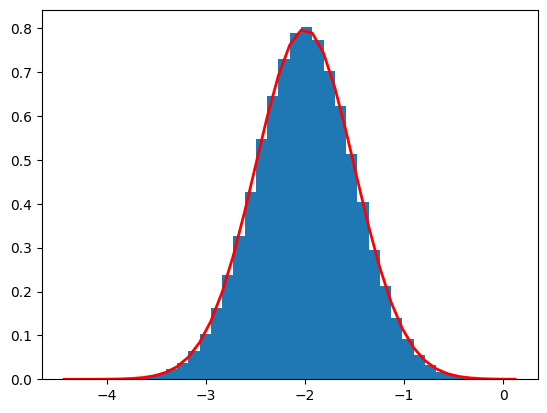

In [7]:
mu, sigma = -2, 0.5  # mean and standard deviation

## TODO ##
samples = np.random.normal(loc = mu, scale = sigma, size=100000)  # do the sampling from the normal distribution here

# plot the histogram of the samples
count, bins, ignored = plt.hist(samples, 40, density=True)

# plot the density function
plt.plot(
    bins,
    1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2) / (2 * sigma**2)),
    linewidth=2,
    color="r",
)

# show the plot
plt.show()

Now let's do the same thing in Pytorch.

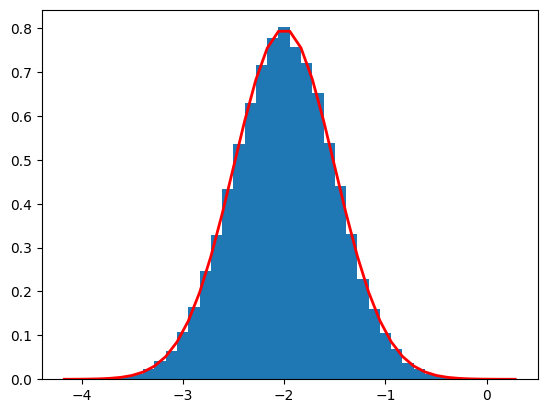

In [8]:
## TODO ##
samples = torch.empty(100000).normal_(mean = mu,std = sigma)  # do the sampling from the normal distribution here
#samples = torch.distributions.Normal(torch.tensor([mu]), torch.tensor([sigma]))

# plot the histogram of the samples
count, bins, ignored = plt.hist(samples.numpy(), 40, density=True)

# plot the density function
plt.plot(
    bins,
    1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2) / (2 * sigma**2)),
    linewidth=2,
    color="r",
)

# show the plot
plt.show()

### 0.3: Solving a Linear Equation

You are given the linear equation <br>
\begin{align*}
Ax=v.
\end{align*} <br>
We want to find the vector x. Assume that the matrix A and the vector v are given as in Exercise 1.1.
Find the solution for x. Hint: Use the function `np.linalg.solve`.

In [9]:
# To solve the linear equation system A x = v, you may use the np.linalg.solve function.
# In other words we can use np.linalg.solve for inverting any matrix which does not stand
# alone.

## TODO ##
x = np.linalg.solve(A, v)  # solve for x here

print(f"Solution: {x=}")
print(f"Test: {A@x=} is the same as {v=}")

Solution: x=array([-0.08333333,  2.41666667, -0.58333333])
Test: A@x=array([3., 1., 2.]) is the same as v=array([3, 1, 2])


### 0.4: PyTorch

PyTorch is strikingly similar to Numpy in terms of its API.
While there are small differences (such as using *dim* instead of *axis* to specify a
certain dimension), most numpy code is straightforward to convert into PyTorch code.

The main point of PyTorch is that it allows for automatic differentiation. Whenever
you perform some differentiable operation on its *Tensor* objects, the gradient of
this operation is automatically tracked. This can be used for (and is at the core of)
modern Deep and Reinforcement Learning.

Below you find a simple example:

In [10]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([6.0, 4.0], requires_grad=True)
c = 3 * a**3 - b**2
objective = c.sum()

## TODO ##
"""
Perform a backward pass on the objective here. This can be done by calling the `backward` method of the `objective` Tensor.
The backward pass will automatically compute the gradients for everything that went into the objective, such as a, b and c
"""
objective.backward()

print(f"Gradient of objective with respect to a: {a.grad}")
print(f"Gradient of objective with respect to b: {b.grad}")

Gradient of objective with respect to a: tensor([36., 81.])
Gradient of objective with respect to b: tensor([-12.,  -8.])


### 0.5: PyTorch

Now that you are familiar with the way that PyTorch tracks gradients through operations,
it is time to fit your first model.
For this, we create a torch *module* that represents the quadratic function
\begin{align*}
f(x)=w_1x^2+w_2x+w_3\text{,}
\end{align*}

and fit it to a training function
\begin{align*}
f(x)=3x^2-2x+5
\end{align*} <br>

using Stochastic Gradient Descent and a Mean Squared Error loss.

In [11]:
class QuadraticFunction(torch.nn.Module):
    def __init__(self):
        super().__init__()  # required for any subclass of torch.nn.Module
        self.coeffs = torch.nn.Parameter(torch.zeros(3))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Compute a function of the form w1*x**2 + w2*x + w3
        """
        ## TODO ##
        # use the weights of the network to represent a quadratic function of the input x.
        # you can access the coefficients with self.coeffs[0], self.coeffs[1] and self.coeffs[2]
        prediction = self.coeffs[0]*x**2+self.coeffs[1]*x+self.coeffs[2]
        return prediction


model = QuadraticFunction()
loss_fn = MSELoss()  # mean squared error
optimizer = SGD(model.parameters(), lr=0.05)  # stochastic gradient descent


def target_function(positions: torch.Tensor) -> torch.Tensor:
    targets = 3 * positions**2 - 2 * positions + 5
    return targets

If you implemented things correctly, you should now be able to fit the model to the ground truth
function using the cell below. The cells below that measure the training loss and show a plot
of your function next to the ground truth respectively.

In [12]:
data_size = 1000
num_epochs = 10

progress_bar = ProgressBar(num_iterations=num_epochs)

epoch_losses = []
for epoch in range(num_epochs):
    # draw data
    positions = torch.rand((data_size,))
    targets = target_function(positions)

    epoch_loss = 0  # reset loss for logging purposes

    for position, target in zip(positions, targets):
        prediction = model(position)  # compute outputs of neural network
        loss = loss_fn(prediction, target)  # compute the loss for the predicted values
        loss.backward()  # accumulate gradients in the model parameters

        optimizer.step()  # increment the weights one step according to the gradients
        optimizer.zero_grad()  # clear the gradients for the next iteration

        epoch_loss += loss.item()
    epoch_loss = epoch_loss / data_size
    epoch_losses.append(epoch_loss)
    progress_bar(
        loss=epoch_loss,
        w1=model.coeffs[0].item(),
        w2=model.coeffs[1].item(),
        w3=model.coeffs[2].item(),
    )

Scalars
Scalars: loss=1.526e-01, w1=8.049e-01, w2=2.177e-01, w3=4.615e+00: 
Scalars: loss=2.141e-02, w1=1.310e+00, w2=-2.735e-01, w3=4.681e+00: 
Scalars: loss=1.399e-02, w1=1.739e+00, w2=-6.883e-01, w3=4.788e+00: 
Scalars: loss=7.655e-03, w1=2.047e+00, w2=-1.003e+00, w3=4.802e+00: 
Scalars: loss=4.359e-03, w1=2.267e+00, w2=-1.236e+00, w3=4.872e+00: 
Scalars: loss=2.542e-03, w1=2.446e+00, w2=-1.409e+00, w3=4.894e+00: 
Scalars: loss=1.572e-03, w1=2.582e+00, w2=-1.558e+00, w3=4.916e+00: 
Scalars: loss=8.673e-04, w1=2.684e+00, w2=-1.663e+00, w3=4.937e+00: 
Scalars: loss=4.827e-04, w1=2.754e+00, w2=-1.746e+00, w3=4.946e+00: 
Scalars: loss=2.858e-04, w1=2.812e+00, w2=-1.802e+00, w3=4.969e+00: 
Iteration 10/10|██████████|00:08<00:00

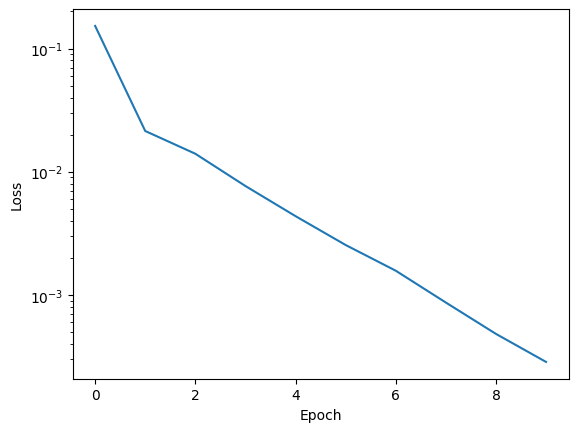

<Figure size 640x480 with 0 Axes>

In [13]:
def plot_loss(loss_history: list[float]):
    plt.plot(range(len(loss_history)), loss_history)
    plt.xlabel("Epoch")
    plt.yscale("log")
    plt.ylabel("Loss")
    save_figure("loss")
    plt.show()
    plt.clf()


plot_loss(loss_history=epoch_losses)

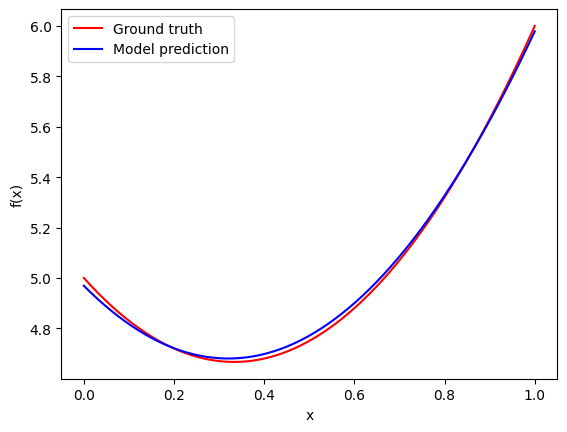

<Figure size 640x480 with 0 Axes>

In [14]:
def plot_fit(quadratic_model: QuadraticFunction) -> None:
    test_positions = torch.linspace(0, 1, 200)
    test_targets = target_function(test_positions)
    with torch.no_grad():  # perform a forward pass without a computation graph
        test_predictions = quadratic_model(torch.Tensor(test_positions)).numpy()

    func_eval_fig = plt.figure()
    plt.figure(func_eval_fig.number)
    plt.plot(test_positions, test_targets, "r", label="Ground truth")
    plt.plot(test_positions, test_predictions, "b", label="Model prediction")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    save_figure("fit")
    plt.show()
    plt.clf()


plot_fit(quadratic_model=model)